# Project: TMDb Data Investigation

## Table of Contents
- [Introduction](#Introduction)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Limitations](#Limitations)

## Introduction

**Questions**:
1. Is there a strong correlation between budget and revenue of a movie?
2. Is there a strong correlation between popularity and revenue of a movie?
3. What is the most popular range of runtime of a movie?

### Setting up

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Data Wrangling

### General Properties

In [2]:
# Load the data
data = pd.read_csv('tmdb-movies.csv', index_col='id')
print('Data contains {} rows and {} columns'.format(*data.shape))
data.head() # display the first five records of the dataset

Data contains 10866 rows and 20 columns


,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj       

We can see there are some null data, to get a sense of how complete the dataset is, let's check for the number of missing values for each columns.

In [4]:
# Check missing values
data.isnull().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We can see that there are many missing values, but fortunately, the majority of the missing values are located in not-so-important columns like `homepage`, `tagline`, `keywords` and `production_companies`. For our investigation, let's focus on the columns with no missing values.

It is also worth mentioning that there are 10 records that is missing the `imdb_id`, which is peculiar since theoretically, every movie should all have an `imdb_id` value, let's show the records that are missing `imdb_id` and see if there are any patterns that emerge.

In [5]:
data[data['imdb_id'].isnull()]

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
355131,NaN,0.108072,0,0,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,NaN,NaN,sexuality|superhuman|superpower|making of|soci...,NaN,25,Documentary|Science Fiction,Netflix,8/10/15,12,7.5,2015,0.000000,0.0
287663,NaN,0.330431,0,0,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,NaN,Steward Lee|Steven G. Lee,NaN,NaN,"A Long Time Ago In A Galaxy Far, Far Awayâ€¦ A...",44,NaN,NaN,10/3/14,13,6.8,2014,0.000000,0.0
15257,NaN,0.607851,0,0,Hulk vs. Wolverine,Fred Tatasciore|Bryce Johnson|Steve Blum|Nolan...,NaN,Frank Paur,NaN,marvel comic|superhero|wolverine|hulk|norse my...,Department H sends in Wolverine to track down ...,38,Animation|Action|Science Fiction,Marvel Studios,1/27/09,38,6.9,2009,0.000000,0.0
101907,NaN,0.256975,0,0,Hulk vs. Thor,Graham McTavish|Fred Tatasciore|Matthew Wolf|J...,NaN,Sam Liu,A Battle Between God and Monster,marvel comic|superhero|hulk|norse mythology|su...,"For ages, Odin has protected his kingdom of As...",41,Action|Animation|Fantasy|Science Fiction,Marvel Studios,1/27/09,38,6.4,2009,0.000000,0.0
45644,NaN,0.067753,0,0,Opeth: In Live Concert At The Royal Albert Hall,"Mikael Ã…kerfeldt|Martin ""Axe"" Axenrot|Martin ...",http://www.opeth.com,NaN,"The Loyal Disharmonic Orchestra, Conducted By ...",NaN,As part of the ongoing celebration of their 20...,163,Music,NaN,9/21/10,10,8.6,2010,0.000000,0.0
369145,NaN,0.167501,0,0,Doctor Who: The Snowmen,Matt Smith|Jenna Coleman|Richard E. Grant|Ian ...,NaN,NaN,NaN,NaN,"Christmas Eve, 1892, and the falling snow is t...",60,NaN,BBC Television UK,12/25/12,10,7.8,2012,0.000000,0.0
269177,NaN,0.090552,0,0,Party Bercy,Florence Foresti,NaN,NaN,NaN,NaN,Florence Foresti is offered Bercy tribute to a...,120,Comedy,TF1 VidÃ©o,9/23/12,15,6.4,2012,0.000000,0.0
279954,NaN,0.004323,500,0,Portal: Survive!,Monique Blanchard|Bradley Mixon,https://www.kickstarter.com/projects/colinandc...,Connor McGuire|Colin McGuire,The Cake is a Lie,portal|aperture,"A short, live action fan film by Collin and Co...",7,Action|Science Fiction,NaN,10/8/13,11,7.5,2013,468.016676,0.0
50127,NaN,0.570337,0,0,Fallen: The Journey,Paul Wesley|Fernanda Andrade|Tom Skerritt|Rick...,NaN,Mikael Salomon,NaN,NaN,"A year later, Aaron is still traveling around ...",80,Action|Adventure|Drama|Fantasy|Family,NaN,1/1/07,11,7.3,2007,0.000000,0.0


There is no immediate pattern that emerges from these 10 records, there might be a pattern that is hidden deeper or simply the dataset is incorrect. But since other columns of these data look right, we will ignore the missing `imdb_id`'s in our investigation.

Next, we will investigate if any movies have no (zero) budget or revenue, since it is impossible in real life for a movie to have no budget or revenue, these movies will probably be inaccuracies in the dataset. We will be using the `revenue_adj` and `budget_adj` columns.

In [6]:
# Get number of movies without budget or revenue
noBudgetOrRevenue = data.query('budget_adj == 0 or revenue_adj == 0').shape[0]
print('Number of movies without budget or revenue: {}'.format(noBudgetOrRevenue))

Number of movies without budget or revenue: 7011


Surprisingly, there are over 7000 movies without any budget or revenue! This could be indicating that these data are *unknown* instead of actually being zero.

In [7]:
# Get number of movies with 0 runtime
noRuntime = data.query('runtime == 0').shape[0]
print('Number of movies with 0 runtime: {}'.format(noRuntime))

Number of movies with 0 runtime: 31


There is not much movies with 0 runtime compared to without revenue or budget, but 31 records will still potentially impact the data analysis.

### Data Cleaning

First of all, since not all columns are needed to answer the questions we ask, we first drop the unnecessary columns, namely, `imdb_id`, `original_title`, `cast`, `director`, `genres`, `production_companies`, `homepage`, `tagline`, `keywords` and `overview`.

In [8]:
data.drop(['imdb_id', 'original_title', 'cast', 'director', 'genres', 'production_companies', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
# Now show information about the new dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 10 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
release_date    10866 non-null object
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(4), int64(5), object(1)
memory usage: 933.8+ KB


Next, remove all duplicate records.

In [9]:
# Drop duplicate data
data.drop_duplicates(inplace=True)

Next, we want to create a smaller dataset without any movies with no budget or revenue.

In [10]:
# Sift out data with both nonzero revenue and budget (both accounting for inflation)
nonzeroBudgetRevenue = data.query('revenue_adj > 0 and budget_adj > 0')
nonzeroBudgetRevenue.head()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Similarly, since there cannot be a movie with runtime of 0 minutes (unless you want tomatoes all over your face!), we will create another smaller dataset without any movies with 0 runtime.

In [11]:
# Sift out data with nonzero runtime
nonzeroRuntime = data.query('runtime > 0')
nonzeroRuntime.head()

,popularity,budget,revenue,runtime,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,
135397,32.985763,150000000,1513528810,124,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,120,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,119,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,136,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,137,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


# Exploratory Data Analysis

## 1. Is there a strong correlation between budget and revenue of a movie?

First, let's just plot the `budget_adj` column over the `revenue_adj` column to identify visually and intuitively if there is a correlation between the two.

Note that we will be using `budget_adj` and `revenue_adj` instead of `budget` and `revenue` to take in account of inflation over time and thus hopefully obtain a more reliable data.

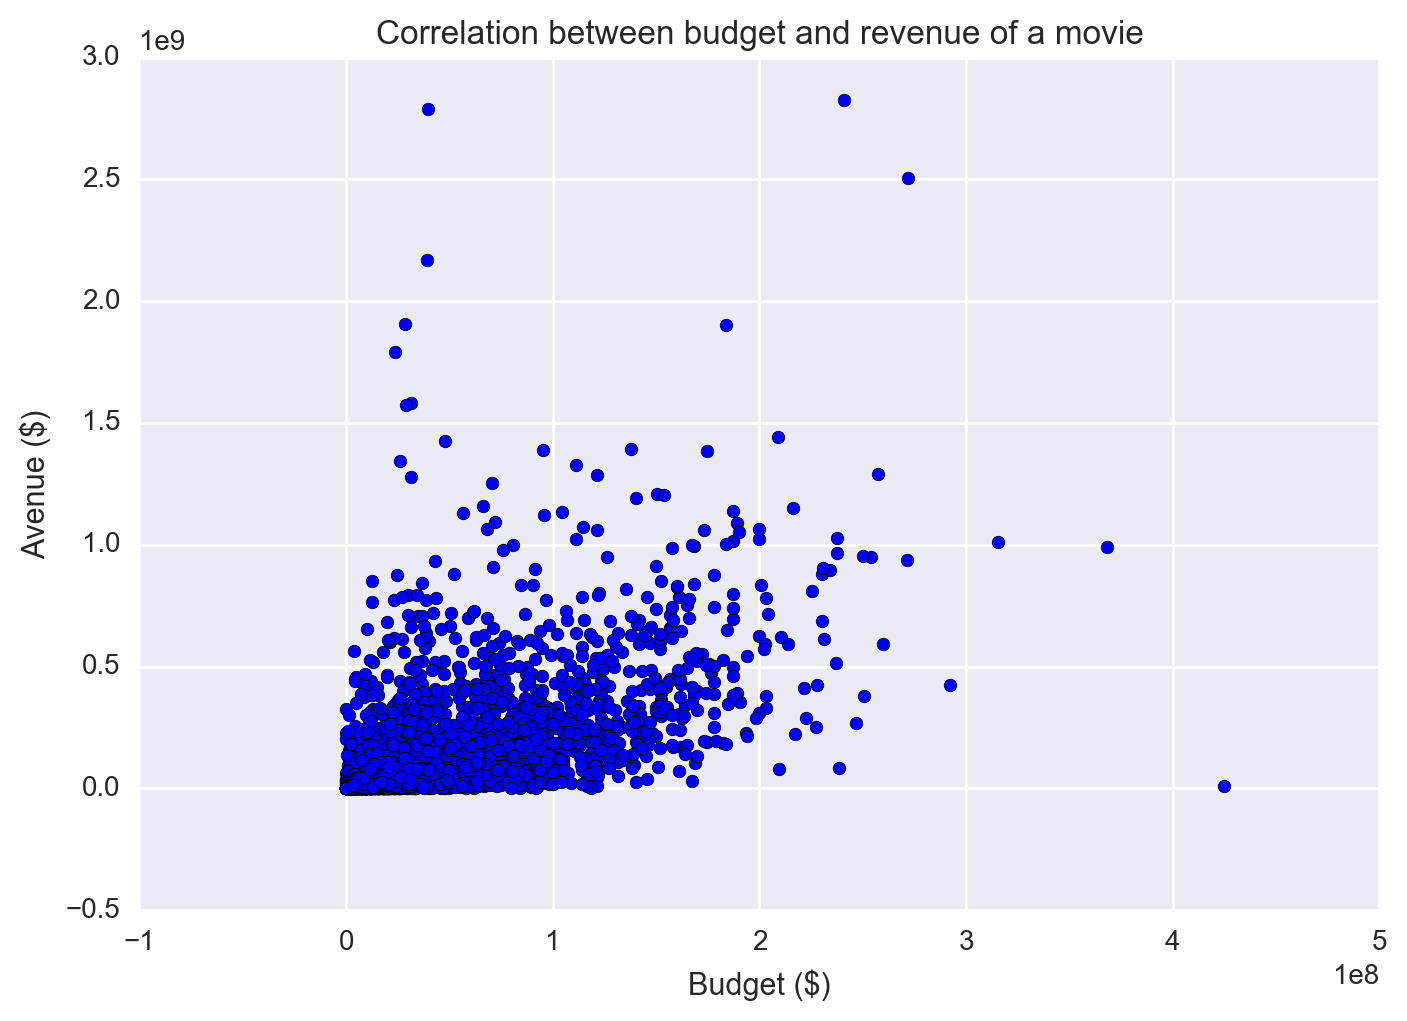

In [12]:
plt.title('Correlation between budget and revenue of a movie');
plt.xlabel('Budget ($)')
plt.ylabel('Avenue ($)')
plt.scatter(nonzeroBudgetRevenue['budget_adj'], nonzeroBudgetRevenue['revenue_adj']);

According the the graph, we can see that there is somewhat of a positive correlation of the two variables, but it is certainly not a strong correlation. Let's calculate Pearson's correlation coefficient (or Pearson's *r*) to find exactly how much do these two correlate.

In [13]:
nonzeroBudgetRevenue['budget_adj'].corr(nonzeroBudgetRevenue['revenue_adj'], method='pearson')

0.57045101958124034

### Conclusion

We can conclude from the graph and the Pearson's correlation coefficient that the budget and the revenue of a movie does have a positive correlation.

## 2. Correlation between Popularity and Revenue?

Similarly, let's first plot the `popularity` column over the `revenue_adj` column to identify visually and intuitively if there is a correlation between the two.

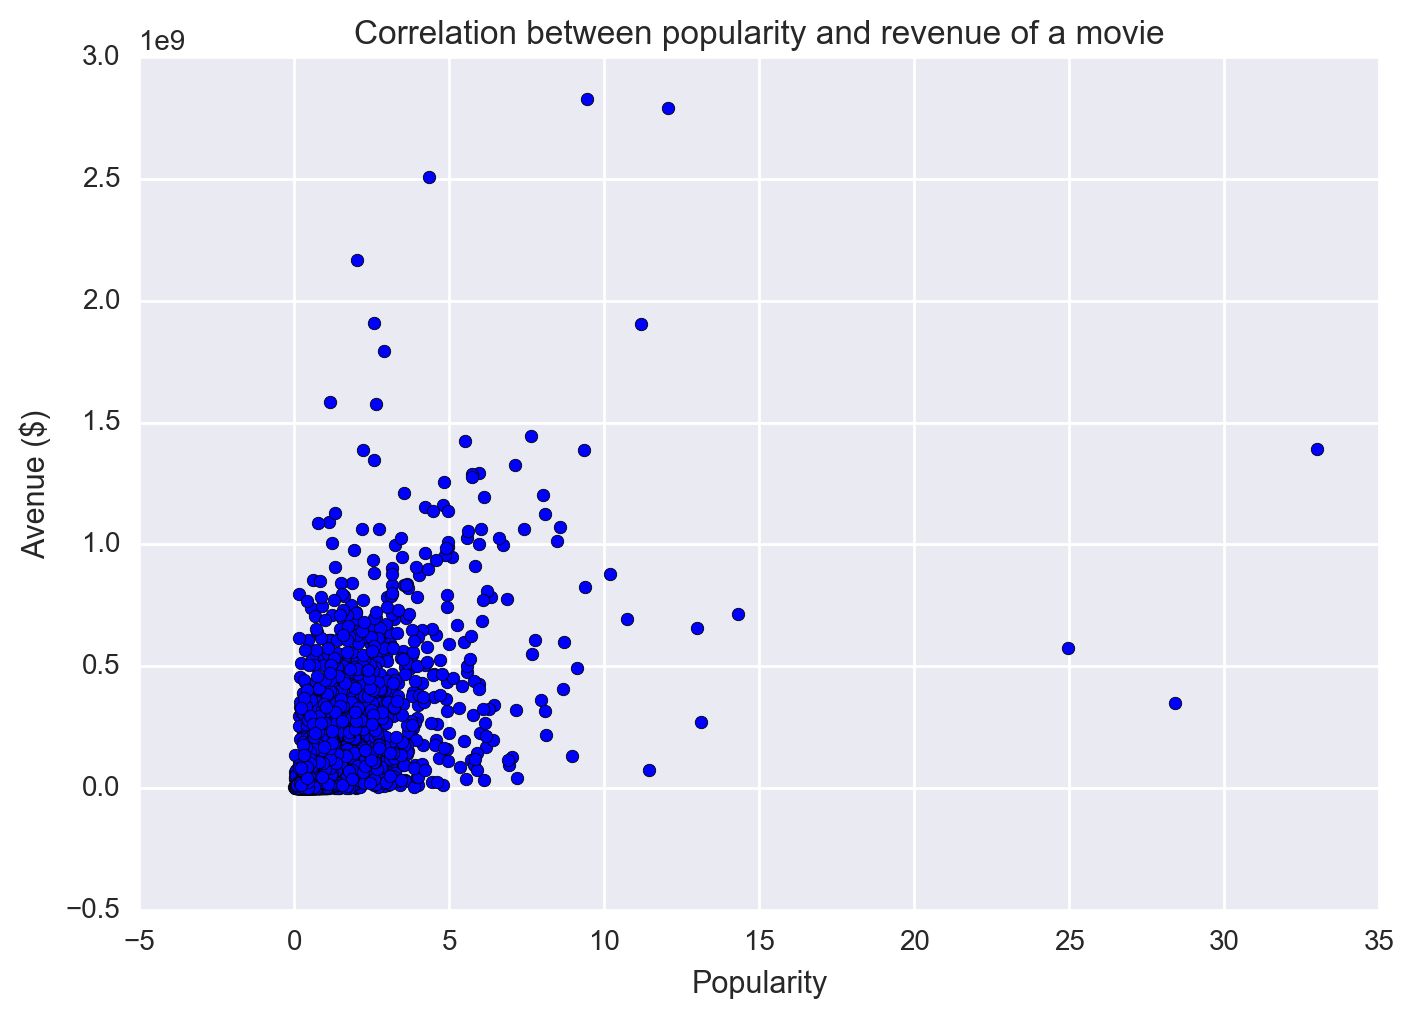

In [14]:
plt.title('Correlation between popularity and revenue of a movie');
plt.xlabel('Popularity')
plt.ylabel('Avenue ($)')
plt.scatter(nonzeroBudgetRevenue['popularity'], nonzeroBudgetRevenue['revenue_adj']);

It seems like it is similar to the previous case, in that there is somewhat of a positive correlation. Let's calculate the Pearson's *r*.

In [15]:
nonzeroBudgetRevenue['popularity'].corr(nonzeroBudgetRevenue['revenue_adj'], method='pearson')

0.54695918461714133

### Conclusion

We can conclude from the graph and the Pearson's correlation coefficient that the popularity and the revenue of a movie does have a positive correlation.

## 3. Most Popular Runtime?

To investigate what are the most popular range of runtimes, let's first plot all the runtimes in a histogram, and see if we can find a pattern.

Since we are not dealing with budgets and revenues, we can use `nonzeroRuntime` instead of `nonzeroBudgetRevenue`.

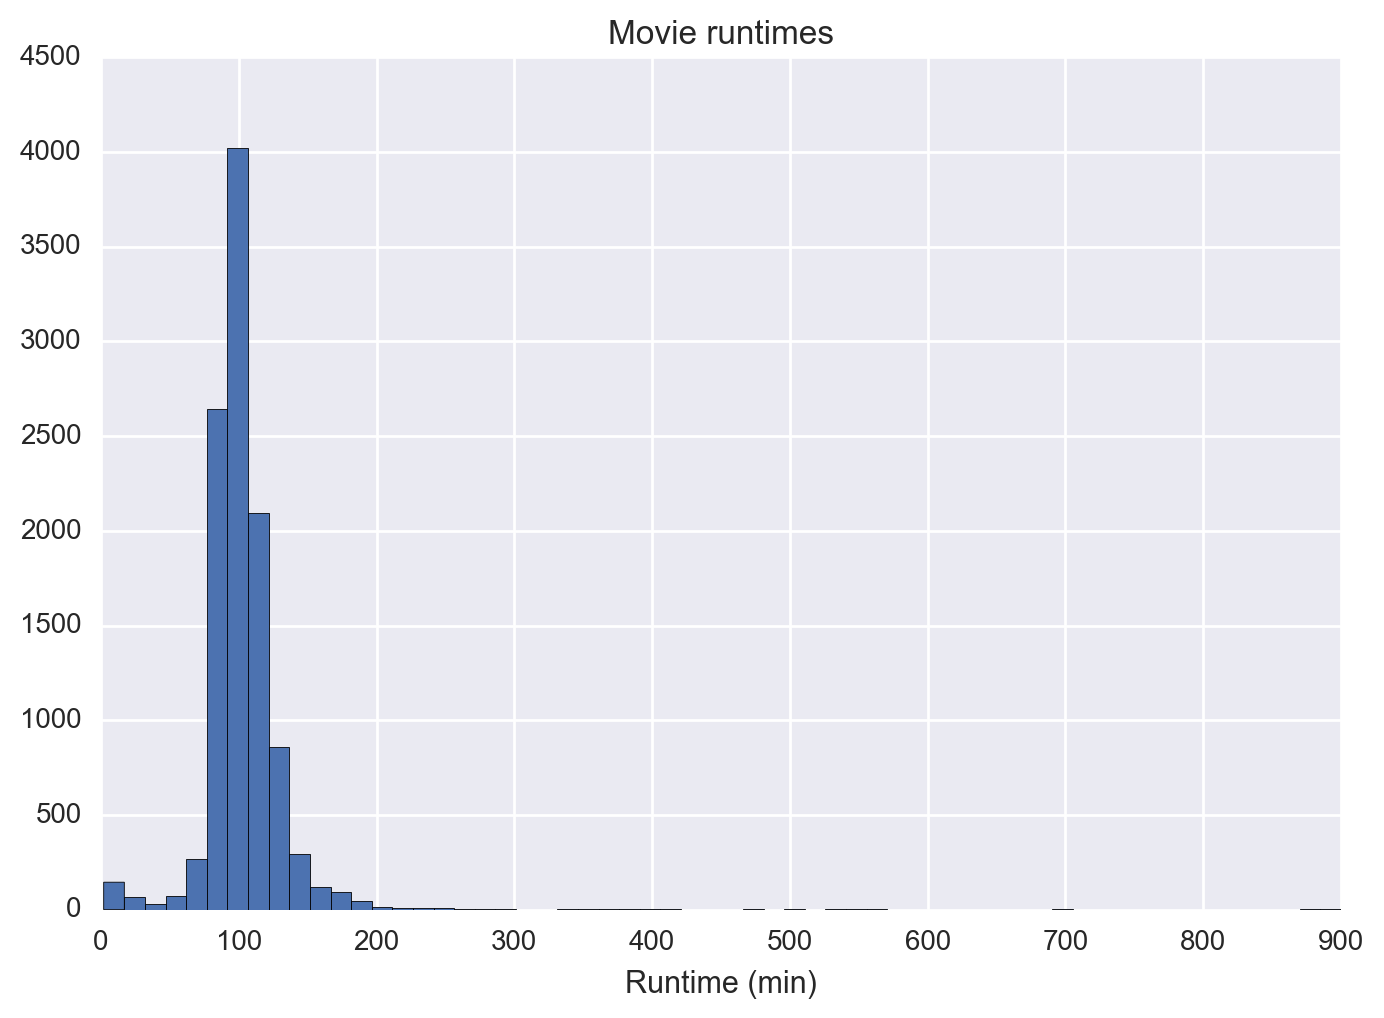

In [16]:
# Plot movie runtimes
plt.title('Movie runtimes')
plt.xlabel('Runtime (min)')
plt.hist(nonzeroRuntime['runtime'], bins=60);

We see that there are many outliers that is way above the majority of runtimes. Therefore, let's only focus in the majority range of runtimes, say the lowest 99% of the runtimes. In future calculations, we will use our dataset with only the first 99% of data.

99 percentile: 184.0


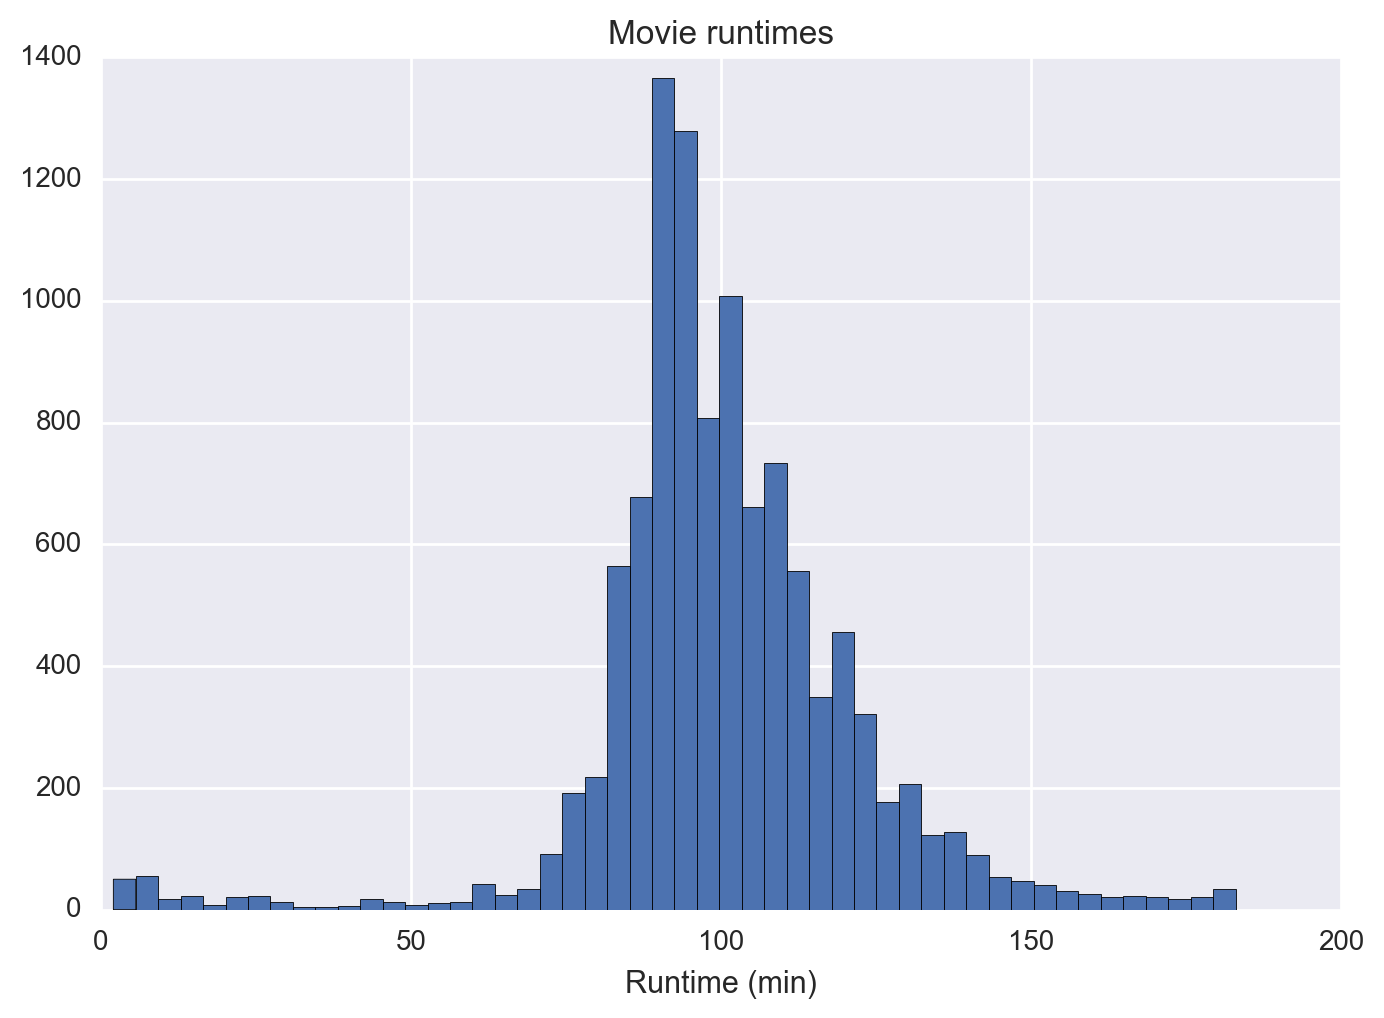

In [17]:
# Get 99% quantile
threshold = nonzeroRuntime['runtime'].quantile(.99)
print('99 percentile: {}'.format(threshold))
# Get new dataset with only the first 99 percentile
majority = nonzeroRuntime[nonzeroRuntime['runtime'] < threshold]
# Plot only the new dataset
plt.title('Movie runtimes')
plt.xlabel('Runtime (min)')
plt.hist(majority['runtime'], bins=50);

We can now see that the distribution of movie runtimes is very close to a slightly positively-skewed normal distribution. Now let's obtain the mean and standard deviation of the data.

In [18]:
mean = majority['runtime'].mean()
std = majority['runtime'].std()
print('Runtime mean: {}'.format(mean))
print('Runtime standard deviation: {}'.format(std))
print('Most popular range: [{}, {}]'.format(mean - std, mean + std))

Runtime mean: 100.616525226
Runtime standard deviation: 22.1942828698
Most popular range: [78.4222423564, 122.810808096]


Finally, just out of curiosity, I wanted to see if movie runtimes show a decreasing trend over time, since I have seen some very long and old movies.

First, let's try to create a scatter plot to plot all the data points.

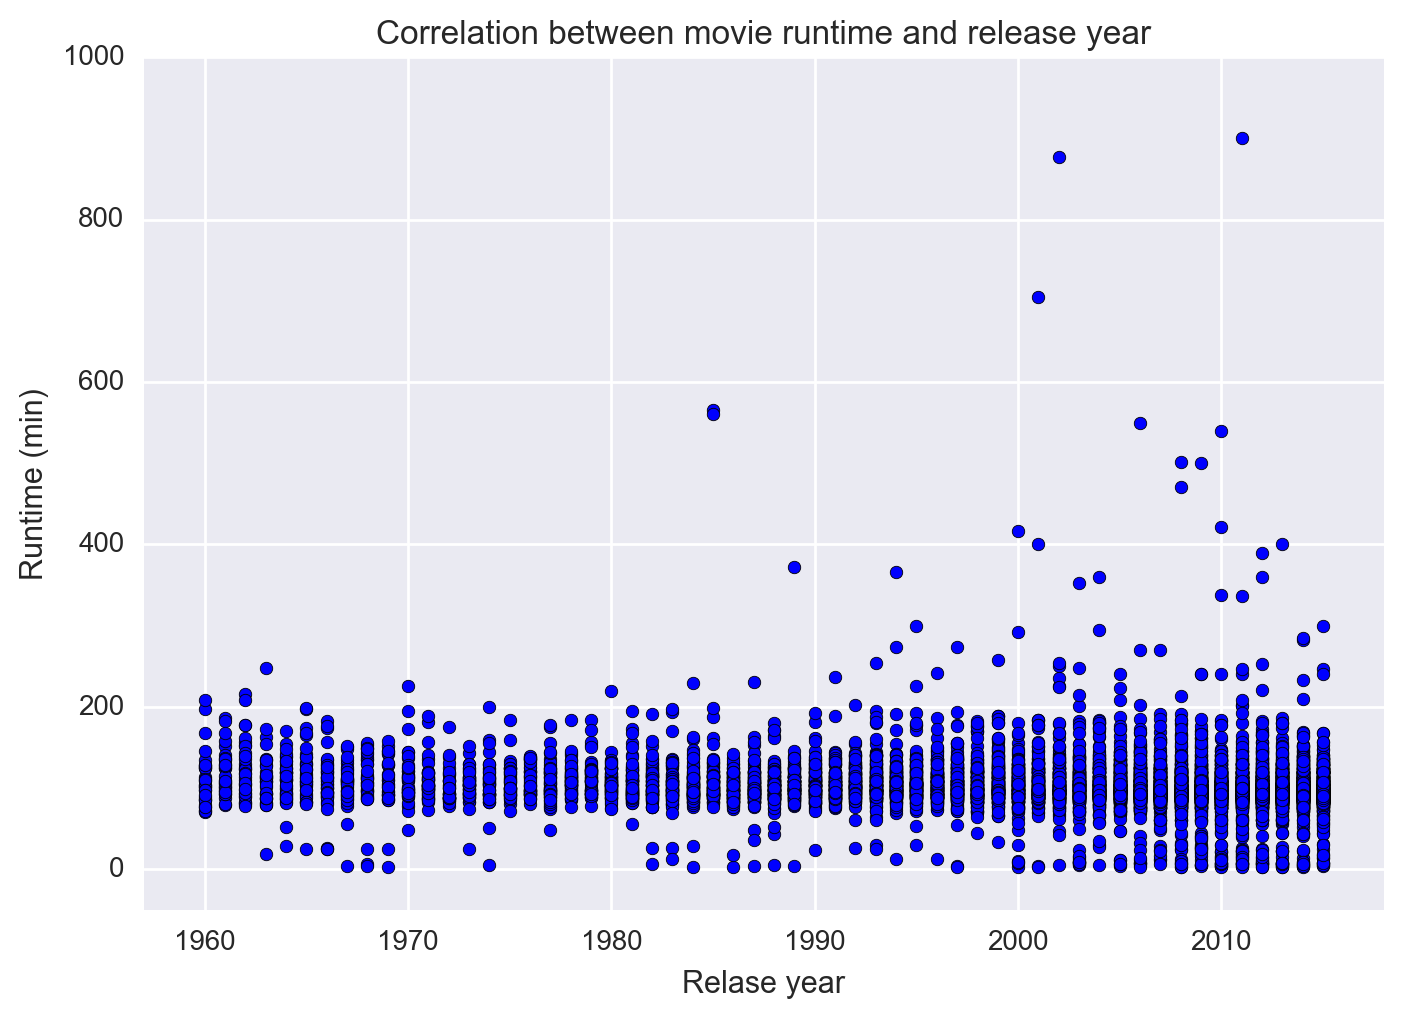

In [19]:
# Create scatter plot
plt.xlim(1957, 2018)
plt.ylim(-50, 1000)
plt.title('Correlation between movie runtime and release year')
plt.xlabel('Relase year')
plt.ylabel('Runtime (min)')
plt.scatter(nonzeroRuntime['release_year'], nonzeroRuntime['runtime']);

From this scatter plot, no immediate pattern emerge, since the runtimes seem to be more or less constant throughout, yet upon closer observation, we see that the number of movies with a really short runtime has increased from aroung 2000 onwards.

Let's try a different approach and plot the *average* movie runtime over the years.

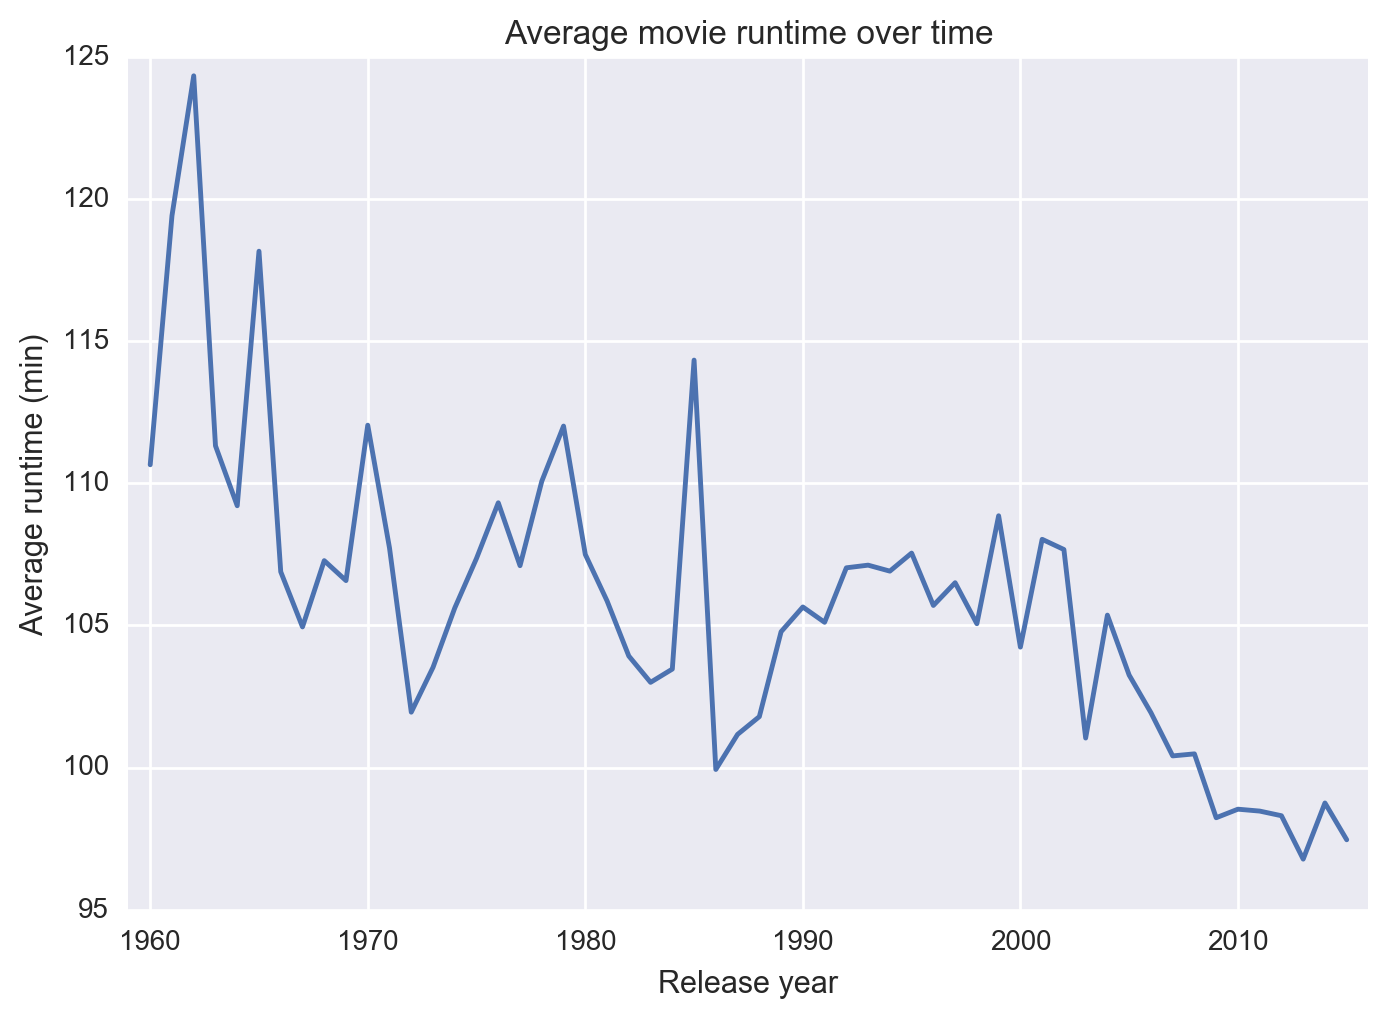

In [20]:
yearRange = range(nonzeroRuntime['release_year'].min(), nonzeroRuntime['release_year'].max() + 1)
averageRuntimes = [nonzeroRuntime[nonzeroRuntime['release_year'] == year]['runtime'].mean() for year in yearRange]
# Create line plot
plt.xlim(1959, 2016)
plt.title('Average movie runtime over time')
plt.xlabel('Release year')
plt.ylabel('Average runtime (min)')
plt.plot(yearRange, averageRuntimes);

There is a clear decreasing trend shown in this line graph, I think the decrease is mainly caused by the increase in the number of movies with very short runtimes.

### Conclusion

We can conclude from the the graph and the mean and standard deviation that the most popular (~68%) runtime ranges from about 77.5 minutes to 123.1 minutes, or 1 hour 17.5 minutes to 2 hour 3.1 minutes, which does match with my past movie-watching experiences.

Also, from 1960 to 2015, the runtime of movies does show a decreasing trend.

## Limitations

In the process of data analysis, there are few limitations that hindered my analysis. One of which is missing data, there are many data that are either missing, or completely unrealistic (e.g. no revenue / budget or 0 minutes for runtimes), or that are somewhat odd (e.g. very short runtime), although I have removed the null data and the 0 data, many other data might have still impacted my analysis. Also, when I looked through the dataset, I saw a lot of records that are TV series instead of movies, these records definitely impacted my analysis, especially the analysis of movie runtimes, since TV series generally have very long runtimes.